In [1]:
%matplotlib inline

In [2]:
from classes.DQNagentClass import DQNAgent, DDQNAgent
from envs.createEnvs import createNNEnv

import matplotlib.pyplot as plt
import numpy as np
import torch

In [3]:
env = createNNEnv()

Loading models...
Models loaded


In [7]:
def trainAgent(agent, path_to_save, n_episodes = 500, max_t = 3000, eps_start = 1.0, eps_end = 0.01, eps_decay = 0.996):
    """Deep Q-Learning
    Params
    ======
        n_episodes (int): maximum number of training epsiodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon 
        eps_decay (float): mutiplicative factor (per episode) for decreasing epsilon
    """
    scores = [] # list containing score from each episode
    durations = [] # list containing duration of each episode
    eps = eps_start

    for i_episode in range(1, n_episodes+1):
        state,_ = env.reset()
        score = 0
        for t in range(1, max_t+1):
            action = agent.act(state,eps)
            #print("State: ", state,"Action: ",action)
            next_state,reward,done,_,_ = env.step(action)
            agent.step(state,action,reward,next_state,done)
            ## above step decides whether we will train(learn) the network actor (local_qnetwork) or we will fill the replay buffer
            ## if len replay buffer is equal to the batch size then we will train the network or otherwise we will add experience tuple in our replay buffer.
            state = next_state
            score += reward

            if done or t == max_t:
                print('Episode: {}\tSteps: {}'.format(i_episode,t))
                scores.append(score)
                durations.append(t)
                break

            eps = max(eps*eps_decay,eps_end)## decrease the epsilon

    # save the model weights
    torch.save(agent.qnetwork_local.state_dict(), path_to_save)

    return scores, durations

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#print(device)
#print(env.action_space.n, env.observation_space.shape[0])

#Si cambio los seed de los agentes superan muchas veces el max_t de 200
dqnagent1 = DQNAgent(state_size=env.observation_space.shape[0], action_size=env.action_space.n, seed=0, fc1_unit=64, fc2_unit=64)
dqnagent2 = DQNAgent(state_size=env.observation_space.shape[0], action_size=env.action_space.n, seed=0, fc1_unit=64, fc2_unit=128)
dqnagent3 = DQNAgent(state_size=env.observation_space.shape[0], action_size=env.action_space.n, seed=0, fc1_unit=128, fc2_unit=64)
dqnagent4 = DQNAgent(state_size=env.observation_space.shape[0], action_size=env.action_space.n, seed=0, fc1_unit=128, fc2_unit=128)
dqnagent5 = DQNAgent(state_size=env.observation_space.shape[0], action_size=env.action_space.n, seed=0, fc1_unit=128, fc2_unit=128)

ddqnagent1 = DDQNAgent(state_size=env.observation_space.shape[0], action_size=env.action_space.n, seed=0, fc1_unit=64, fc2_unit=64)
ddqnagent2 = DDQNAgent(state_size=env.observation_space.shape[0], action_size=env.action_space.n, seed=0, fc1_unit=64, fc2_unit=128)
ddqnagent3 = DDQNAgent(state_size=env.observation_space.shape[0], action_size=env.action_space.n, seed=0, fc1_unit=128, fc2_unit=64)
ddqnagent4 = DDQNAgent(state_size=env.observation_space.shape[0], action_size=env.action_space.n, seed=0, fc1_unit=128, fc2_unit=128)
ddqnagent5 = DDQNAgent(state_size=env.observation_space.shape[0], action_size=env.action_space.n, seed=0, fc1_unit=128, fc2_unit=128)

agents_arr = [dqnagent1, dqnagent2, dqnagent3, dqnagent4, dqnagent5, ddqnagent1, ddqnagent2, ddqnagent3, ddqnagent4, ddqnagent5]
scores_arr = []
durations_arr = []

In [8]:
#TRAINING
train = True
NUM_DQN_AGENTS = 5
NUM_DDQN_AGENTS = 5

if train:
    for agent in agents_arr:
        if agents_arr.index(agent) < NUM_DQN_AGENTS:
            print("DQN Agent", agents_arr.index(agent)+1,"/",len(agents_arr))
            path_to_save = "../data/models/DQNagent"+str(agents_arr.index(agent)+1)+".pt"
        else:
            print("DDQN Agent", agents_arr.index(agent)+1,"/",len(agents_arr))
            path_to_save = "../data/models/DDQNagent"+str(agents_arr.index(agent)+1-NUM_DQN_AGENTS)+".pt"
        scores, durations = trainAgent(agent, path_to_save)
        scores_arr.append(scores)
        durations_arr.append(durations)
else:
    for agent in agents_arr:
        if agents_arr.index(agent) < NUM_DQN_AGENTS:
            print("DQN Agent", agents_arr.index(agent)+1,"/",len(agents_arr))
            path_to_load = "../data/models/DQNagent"+str(agents_arr.index(agent)+1)+".pt"
        else:
            print("DDQN Agent", agents_arr.index(agent)+1,"/",len(agents_arr))
            path_to_load = "../data/models/DDQNagent"+str(agents_arr.index(agent)+1-NUM_DQN_AGENTS)+".pt"
        agent.qnetwork_local.load_state_dict(torch.load(path_to_load))
        agent.qnetwork_local.eval()

DQN Agent 1 / 10
Episode: 1	Steps: 69
Episode: 2	Steps: 19
Episode: 3	Steps: 14
Episode: 4	Steps: 19
Episode: 5	Steps: 18
Episode: 6	Steps: 21
Episode: 7	Steps: 25
Episode: 8	Steps: 16
Episode: 9	Steps: 20
Episode: 10	Steps: 29
Episode: 11	Steps: 79
Episode: 12	Steps: 8
Episode: 13	Steps: 8
Episode: 14	Steps: 15
Episode: 15	Steps: 19
Episode: 16	Steps: 9
Episode: 17	Steps: 8
Episode: 18	Steps: 8
Episode: 19	Steps: 10
Episode: 20	Steps: 9
Episode: 21	Steps: 8
Episode: 22	Steps: 8
Episode: 23	Steps: 9
Episode: 24	Steps: 3000
Episode: 25	Steps: 117
Episode: 26	Steps: 36
Episode: 27	Steps: 8
Episode: 28	Steps: 52
Episode: 29	Steps: 8
Episode: 30	Steps: 16
Episode: 31	Steps: 8
Episode: 32	Steps: 19
Episode: 33	Steps: 8
Episode: 34	Steps: 8
Episode: 35	Steps: 13
Episode: 36	Steps: 10
Episode: 37	Steps: 14
Episode: 38	Steps: 8
Episode: 39	Steps: 8
Episode: 40	Steps: 30
Episode: 41	Steps: 8
Episode: 42	Steps: 14
Episode: 43	Steps: 40
Episode: 44	Steps: 8
Episode: 45	Steps: 8
Episode: 46	Steps:

Agent 1 steps stats: 	Average 48.25 	Std dev 251.3 	Median 8.0
fc1_units: 64 	fc2_units: 64
Agent 2 steps stats: 	Average 70.7 	Std dev 287.84 	Median 8.0
fc1_units: 64 	fc2_units: 128
Agent 3 steps stats: 	Average 194.27 	Std dev 453.65 	Median 20.0
fc1_units: 128 	fc2_units: 64
Agent 4 steps stats: 	Average 23.61 	Std dev 52.09 	Median 14.0
fc1_units: 128 	fc2_units: 128
Agent 5 steps stats: 	Average 19.32 	Std dev 133.8 	Median 9.0
fc1_units: 128 	fc2_units: 128
Agent 6 steps stats: 	Average 10.5 	Std dev 13.9 	Median 8.0
fc1_units: 64 	fc2_units: 64
Agent 7 steps stats: 	Average 12.25 	Std dev 9.68 	Median 8.0
fc1_units: 64 	fc2_units: 128
Agent 8 steps stats: 	Average 10.47 	Std dev 11.1 	Median 8.0
fc1_units: 128 	fc2_units: 64
Agent 9 steps stats: 	Average 16.31 	Std dev 34.5 	Median 8.0
fc1_units: 128 	fc2_units: 128
Agent 10 steps stats: 	Average 98.44 	Std dev 370.64 	Median 8.0
fc1_units: 128 	fc2_units: 128


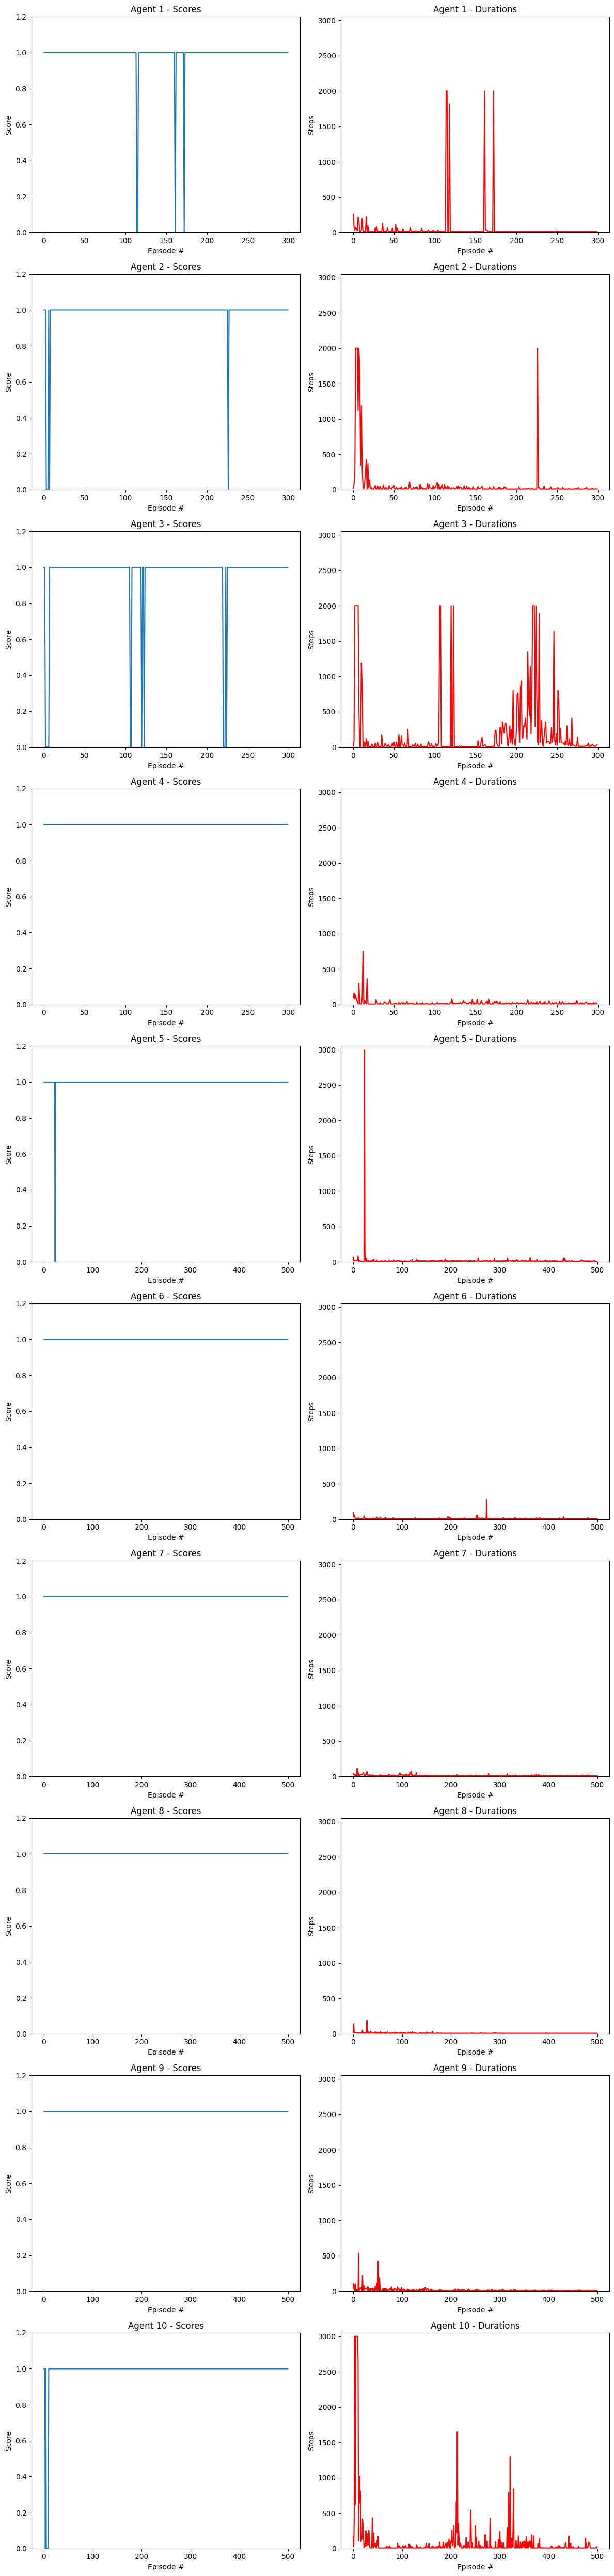

In [13]:
# Si no entreno, no puedo plotear pq desconozco los scores y las duraciones

if train:
    # Create a figure with subplots for each pair
    fig, axes = plt.subplots(len(agents_arr), 2, figsize=(12, 5*len(agents_arr)))

    for i in range(len(agents_arr)):
        scores = scores_arr[i]  # Access the scores for the current agent
        durations = durations_arr[i]  # Access the durations for the current agent

        # Print information before each pair of subplots
        print("Agent", i+1, "steps stats:", "\tAverage", round(np.mean(durations), 2), "\tStd dev", round(np.std(durations), 2), "\tMedian", round(np.median(durations), 2))
        print("fc1_units:", agents_arr[i].qnetwork_local.fc2.in_features, "\tfc2_units:", agents_arr[i].qnetwork_local.fc2.out_features)
        # Define the axes for the current agent's pair of subplots
        ax_scores = axes[i, 0]
        ax_durations = axes[i, 1]

        # Plot the scores in the first subplot
        ax_scores.plot(np.arange(len(scores)), scores)
        ax_scores.set_ylabel('Score')
        ax_scores.set_xlabel('Episode #')
        ax_scores.set_title(f'Agent {i+1} - Scores')
        
        # Set Y-axis limits for scores between 0 and 1
        ax_scores.set_ylim(0, 1.2)

        # Plot the durations in the second subplot
        ax_durations.plot(np.arange(len(durations)), durations, 'r')
        ax_durations.set_ylabel('Steps')
        ax_durations.set_xlabel('Episode #')
        ax_durations.set_title(f'Agent {i+1} - Durations')

        # Set Y-axis limits for durations between 0 and 1000
        ax_durations.set_ylim(0, 3050)

    # Adjust layout for better readability
    plt.tight_layout()

    # Show the combined plot
    plt.show()

In [11]:
def create_grids(agent, env):
    from collections import defaultdict

    n_rows, n_cols = env.unwrapped.num_rows, env.unwrapped.num_cols

    state_value = defaultdict(float)
    policy = defaultdict(int)
    agent.qnetwork_local.eval()

    for col in range(n_cols):
        for row in range(n_rows):
            state = torch.from_numpy(np.array([row,col])).float().unsqueeze(0).to(device)
            with torch.no_grad():
                action_values = agent.qnetwork_local(state)
            obs = (row, col)
            state_value[obs] = float(np.max(action_values.cpu().data.numpy()[0]))
            policy[obs] = int(np.argmax(action_values.cpu().data.numpy()[0]))

            #print(" State: ",state.cpu().data.numpy()[0],"Action values: ",action_values.cpu().data.numpy()[0])
            #print(" State value: ",state_value[state],"Policy: ",policy[state])

    # create a grid for the state values
    value_grid = np.zeros((n_rows, n_cols))
    for obs, value in state_value.items():
        value_grid[obs] = value

    # create a grid for the policy. In each state we should show the action that has the highest int(np.argmax(action_values))
    policy_grid = np.zeros((n_rows, n_cols))
    for obs, action in policy.items():
        policy_grid[obs] = action

    string_policy_grid = np.chararray((n_rows, n_cols), unicode=True)
    for i in range(5):
        for j in range(5):
            #Grid positions [0,2], [1,2], [3,2], [4,2] are walls, so we dont want to show an action for them, instead show an X. 
            #We also dont want to show an action for the goal, so we show a G in the grid position [0,4]
            if j == 2 and (i == 0 or i == 1 or i == 3 or i == 4):
                string_policy_grid[i][j] = 'X'
            elif i == 0 and j == 4:
                string_policy_grid[i][j] = 'G'
            elif policy_grid[i][j] == 0:
                string_policy_grid[i][j] = '↑'
            elif policy_grid[i][j] == 1:
                string_policy_grid[i][j] = '↓'
            elif policy_grid[i][j] == 2:
                string_policy_grid[i][j] = '←'
            elif policy_grid[i][j] == 3:
                string_policy_grid[i][j] = '→'
            else:
                string_policy_grid[i][j] = 'X'
    #print(string_policy_grid)

    return value_grid, policy_grid, string_policy_grid

In [18]:
def plot_string_policy(string_policy_grid):
    from matplotlib.colors import ListedColormap
    from matplotlib.patches import Patch

    map_data = np.array(string_policy_grid)
    
    colors = ['red', 'black', 'lightgreen', 'green', 'gray', 'blue']
    cmap = ListedColormap(colors)

    # Create an array of integers based on the character array
    numeric_map = np.zeros(map_data.shape, dtype=int)
    for i, char in enumerate(['↓', 'X', '→', 'G', '↑', '←']):
        numeric_map[map_data == char] = i

    # Create the plot using imshow
    fig, ax = plt.subplots()
    im = ax.imshow(numeric_map, cmap=cmap, norm=plt.Normalize(0, len(colors)))

    # Add character annotations
    for i in range(map_data.shape[0]):
        for j in range(map_data.shape[1]):
            char = map_data[i, j]
            ax.text(j, i, char, ha='center', va='center', color='black', fontsize=12)

    # add a legend
    legend_elements = [
        Patch(facecolor="gray", edgecolor="black", label="Up"),
        Patch(facecolor="red", edgecolor="black", label="Down"),
        Patch(facecolor="blue", edgecolor="black", label="Left"),
        Patch(facecolor="lightgreen", edgecolor="black", label="Right"),
        Patch(facecolor="green", edgecolor="black", label="Goal"),
    ]
    ax.legend(handles=legend_elements, bbox_to_anchor=(1.3, 1))

    return fig

In [19]:
value_grids = []
policy_grids = []
string_policy_grids = []

for agent in agents_arr:
    value_grid, policy_grid, string_policy_grid = create_grids(agent, env)
    value_grids.append(value_grid)
    policy_grids.append(policy_grid)
    string_policy_grids.append(string_policy_grid)

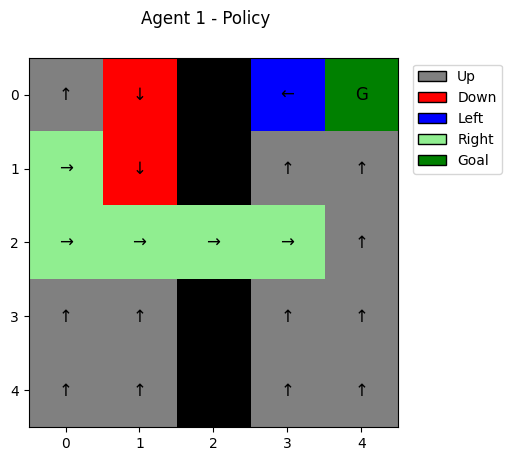

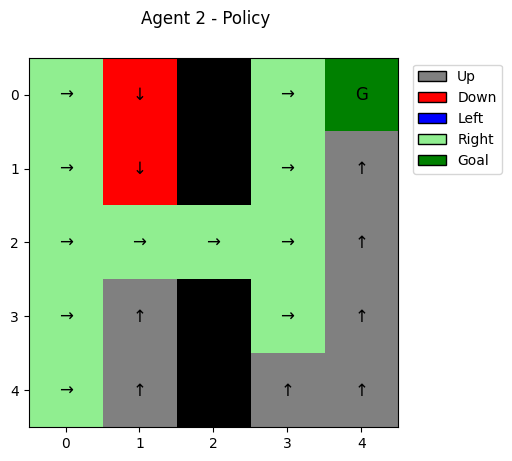

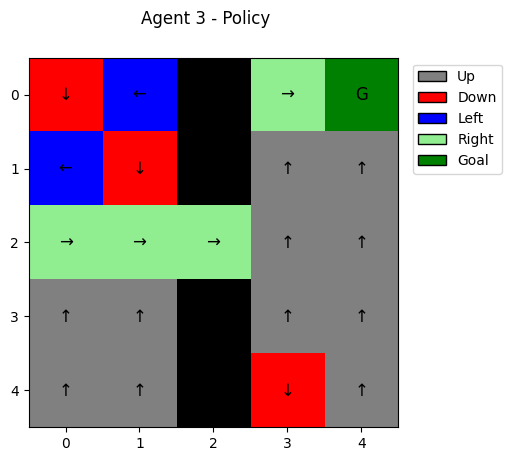

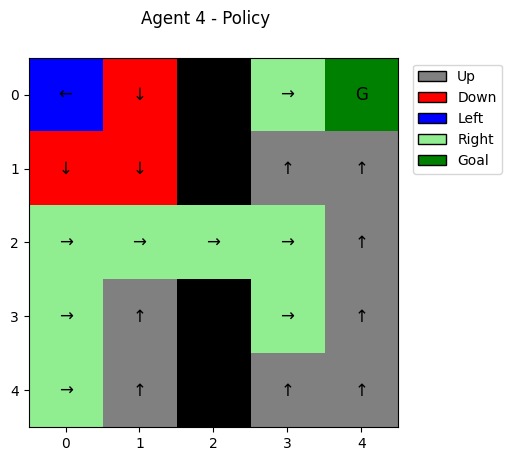

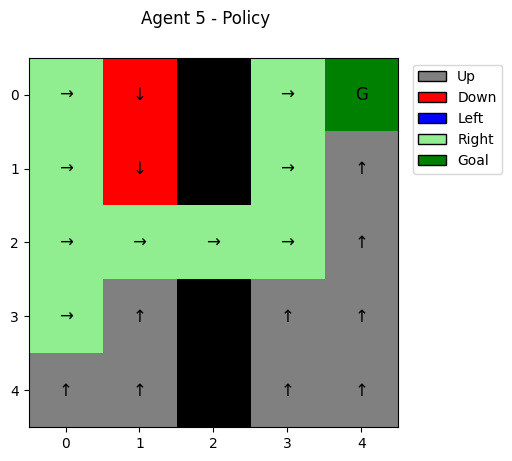

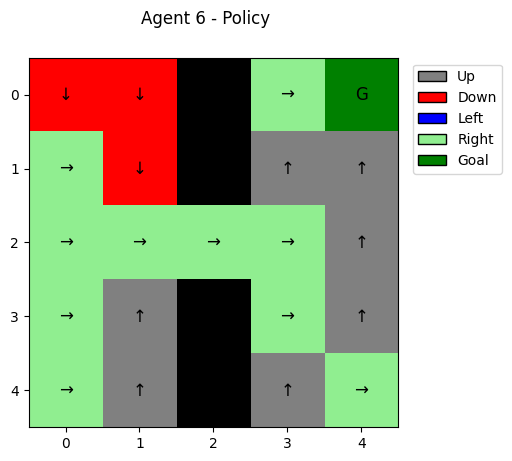

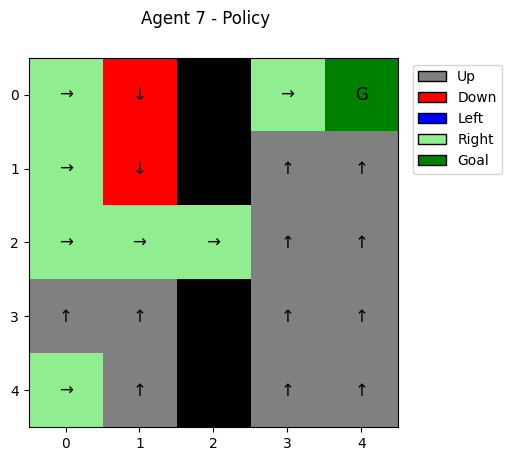

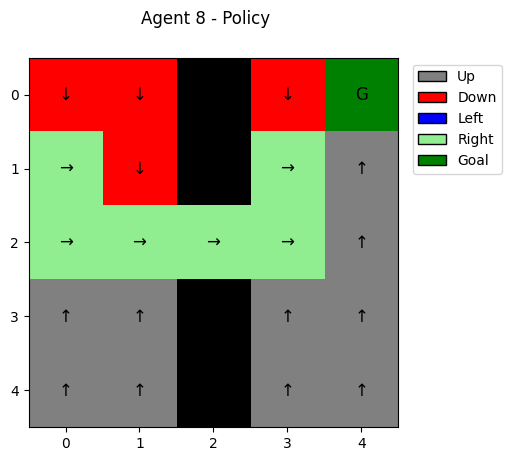

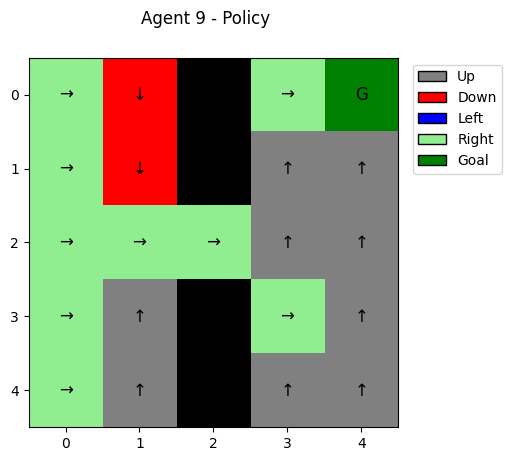

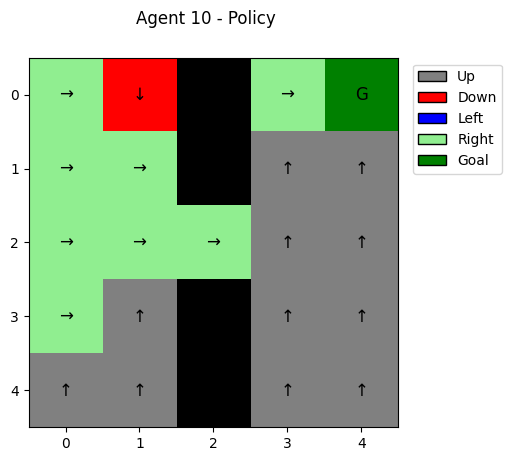

In [20]:
for i in range(len(agents_arr)):
    #print("Agent", i+1, "value grid:")
    #print(value_grids[i])
    #print("Agent", i+1, "policy grid:")
    #print(policy_grids[i])
    #print("Agent", i+1, "policy grid string:")
    #print(string_policy_grids[i])
    fig = plot_string_policy(string_policy_grids[i])
    fig.suptitle(f'Agent {i+1} - Policy')
plt.show()

In [24]:
#load the weights from file

#Hay que tener cuidado de darle correctamente el mismo tamaño de capas que al modelo que se quiere cargar
agent_replay = DDQNAgent(state_size=env.observation_space.shape[0],action_size=env.action_space.n,seed=0, fc1_unit=128, fc2_unit=128)
agent_replay.qnetwork_local.load_state_dict(torch.load('../data/models/DDQNagent4.pt'))
agent_replay.qnetwork_local.eval()

with open(f"../data/csv/historyDQN.csv", 'a') as f:
    #f.write(f"step,y,x,action,next_y,next_x,reward,done\n")
    for i in range(1):
        obs, _ = env.reset()

        t = 0
        done = False
        while not done:
            action = agent_replay.act(obs)
            prev_state = [obs[0], obs[1], action]
            obs, rew, done, _, _ = env.step(action)

            #f.write(f"{t},{prev_state[0]},{prev_state[1]},{prev_state[2]},{obs[0]},{obs[1]},{rew},{done}\n")
            t += 1
        print("Agente", i+1, "terminado en", t, "pasos")


Agente 1 terminado en 8 pasos
